In [1]:
#1. Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2. Read the data file and show the data
df = pd.read_csv('/Users/mac/Documents/HK6/IS403.PTDL KD/đồ án main/code/Data_stock_VJC_VN.csv')
df

,time,open,high,low,close,volume
0,2019-03-01,117964,118955,115981,118955,1125320
1,2019-03-04,119451,120145,118658,119847,990660
2,2019-03-05,119550,119649,118459,118955,1074790
3,2019-03-06,118955,119946,118955,119946,939310
4,2019-03-07,119946,120541,119847,120343,1014890
...,...,...,...,...,...,...
1247,2024-02-23,103800,104400,103400,103800,670800
1248,2024-02-26,103900,104900,103900,104500,605600
1249,2024-02-27,104800,104800,103500,103500,647800
1250,2024-02-28,103500,104700,103300,103400,638600


In [3]:
# 3. Divide the train:test at a ratio of 9:1
df = df[['close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing
train_size = int(0.9 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
# 4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)  

In [6]:
# 6. The process of creating index predict the next 30, 60, 90 days
last_index = df.index[-1]

# Create arrays of consecutive integers starting from last_index for 30, 60, and 90 days
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

# Predict the closing prices for the next 30, 60, and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 30, 60, 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)


Predicted closing prices for the next 30 days:
[107636.46762565 107619.29187411 107602.11612257 107584.94037103
 107567.76461949 107550.58886795 107533.41311641 107516.23736487
 107499.06161333 107481.88586179 107464.71011025 107447.53435871
 107430.35860717 107413.18285563 107396.00710409 107378.83135255
 107361.65560101 107344.47984947 107327.30409793 107310.12834639
 107292.95259485 107275.77684331 107258.60109177 107241.42534023
 107224.24958869 107207.07383715 107189.89808561 107172.72233407
 107155.54658253 107138.37083099]
Predicted closing prices for the next 60 days:
[107636.46762565 107619.29187411 107602.11612257 107584.94037103
 107567.76461949 107550.58886795 107533.41311641 107516.23736487
 107499.06161333 107481.88586179 107464.71011025 107447.53435871
 107430.35860717 107413.18285563 107396.00710409 107378.83135255
 107361.65560101 107344.47984947 107327.30409793 107310.12834639
 107292.95259485 107275.77684331 107258.60109177 107241.42534023
 107224.24958869 107207.073

In [7]:
# 7. Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import numpy as np

# Calculate RMSE 
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_test = mean_absolute_percentage_error(y_test, y_pred)

# Calculate MLSE 
msle_test = mean_squared_log_error(y_test, y_pred)


print("RMSE:", rmse_test)
print("MAPE:", mape_test, "%")
print("MSLE:", msle_test)

RMSE: 6444.342031846145
MAPE: 5.132731941502613 %
MSLE: 0.003817027726418925


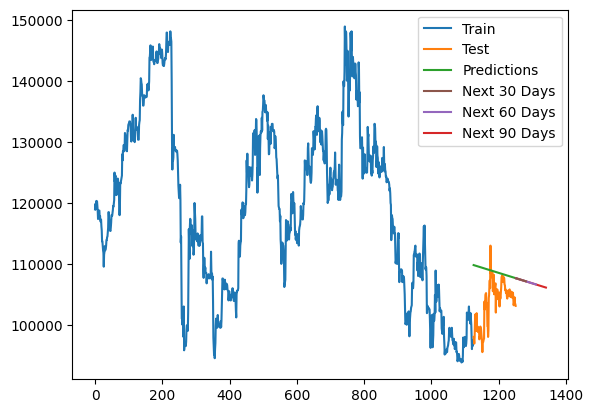

In [8]:
# 8.Plot the results
line1, = plt.plot(train_data.index, train_data['close'], label='Train')
line2, = plt.plot(test_data.index, test_data['close'], label='Test')
line3, = plt.plot(test_data.index, y_pred, label='Predictions')
line4, = plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days')
line5, = plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next 60 Days')
line6, = plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next 30 Days')
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.show()